# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Jack\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Jack\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Jack\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 1. 線性迴歸基本概念

#### 直線

$$f(x) = 1.2x + 0.8$$



In [2]:
#準備 50 個點
#5-0/50 = 0.1 +....
# 0~5線性切割
x = np.linspace(0, 5, 50)
print(x)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]


In [3]:
y = 1.2*x + 0.8
y

array([0.8       , 0.92244898, 1.04489796, 1.16734694, 1.28979592,
       1.4122449 , 1.53469388, 1.65714286, 1.77959184, 1.90204082,
       2.0244898 , 2.14693878, 2.26938776, 2.39183673, 2.51428571,
       2.63673469, 2.75918367, 2.88163265, 3.00408163, 3.12653061,
       3.24897959, 3.37142857, 3.49387755, 3.61632653, 3.73877551,
       3.86122449, 3.98367347, 4.10612245, 4.22857143, 4.35102041,
       4.47346939, 4.59591837, 4.71836735, 4.84081633, 4.96326531,
       5.08571429, 5.20816327, 5.33061224, 5.45306122, 5.5755102 ,
       5.69795918, 5.82040816, 5.94285714, 6.06530612, 6.1877551 ,
       6.31020408, 6.43265306, 6.55510204, 6.67755102, 6.8       ])

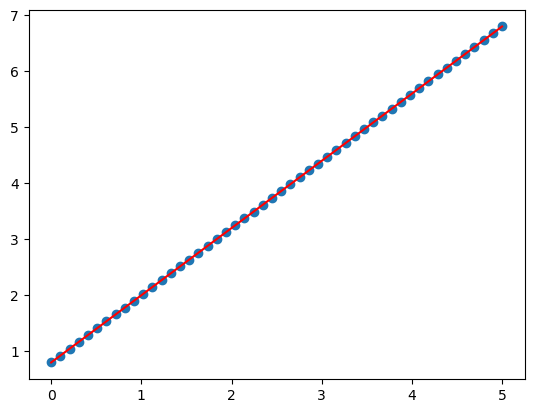

In [4]:
#畫圖
plt.scatter(x,y)
plt.plot(x, 1.2*x+0.8, 'r')

#### add noise 

$$f(x) + \varepsilon(x)$$


In [5]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)
print(y)

[ 0.92814303 -0.04545008  0.70495344 -0.73347613  0.45327557  0.88510911
  1.01694434  1.22985502  1.36453106  2.53396438  2.65715265  2.50003746
  2.23573437  2.3641987   2.1447655   2.49438729  1.75195007  3.85408777
  2.9917492   3.41669576  2.23197137  3.42616652  3.62665861  4.07051068
  4.42531712  3.73002972  4.28806149  3.64820027  4.13787753  5.32330371
  4.10857043  4.72355129  4.82474546  5.21605173  5.97151977  5.64320265
  4.31035947  5.07740596  4.77837395  6.23826597  4.80582842  4.94538827
  5.16005286  5.89481512  5.75029378  6.18344912  5.86626482  7.39488649
  7.44197108  6.23139251]


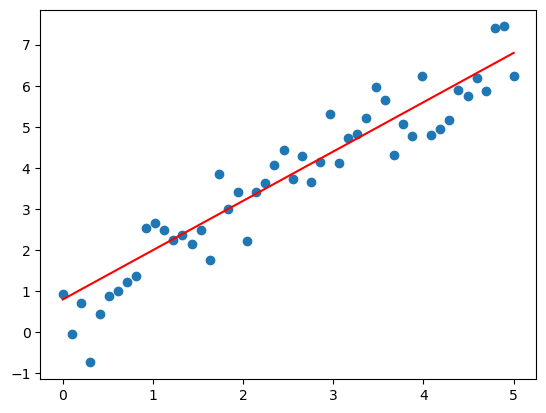

In [6]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

In [7]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [8]:
regr

LinearRegression()

要求資料轉換<br>

$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$


矩陣的概念

In [9]:
print(x.shape)
X = x.reshape(-1,1)
X.shape

(50,)


(50, 1)

In [10]:
regr.fit(X,y)

LinearRegression()

In [11]:
Y = regr.predict(X)
print(Y)

[0.52556349 0.65449812 0.78343275 0.91236738 1.04130201 1.17023664
 1.29917127 1.42810589 1.55704052 1.68597515 1.81490978 1.94384441
 2.07277904 2.20171367 2.33064829 2.45958292 2.58851755 2.71745218
 2.84638681 2.97532144 3.10425607 3.23319069 3.36212532 3.49105995
 3.61999458 3.74892921 3.87786384 4.00679847 4.13573309 4.26466772
 4.39360235 4.52253698 4.65147161 4.78040624 4.90934087 5.03827549
 5.16721012 5.29614475 5.42507938 5.55401401 5.68294864 5.81188327
 5.94081789 6.06975252 6.19868715 6.32762178 6.45655641 6.58549104
 6.71442567 6.84336029]


In [12]:
#了解你的訓練參數
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

0.3809661883956009


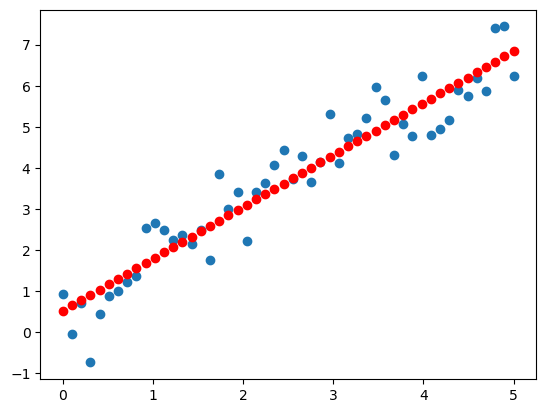

In [13]:
plt.scatter(x, y) #原本 
plt.plot(x, Y, 'ro') #預測
#calculate mse
mse = np.sum((Y-y)**2) / len(y)
print(mse)

In [14]:
#Y=WX+b
W=regr.coef_#斜率
W



array([1.26355936])

In [15]:
b=regr.intercept_ #截距
b

0.5255634936193481

In [16]:
Y

array([0.52556349, 0.65449812, 0.78343275, 0.91236738, 1.04130201,
       1.17023664, 1.29917127, 1.42810589, 1.55704052, 1.68597515,
       1.81490978, 1.94384441, 2.07277904, 2.20171367, 2.33064829,
       2.45958292, 2.58851755, 2.71745218, 2.84638681, 2.97532144,
       3.10425607, 3.23319069, 3.36212532, 3.49105995, 3.61999458,
       3.74892921, 3.87786384, 4.00679847, 4.13573309, 4.26466772,
       4.39360235, 4.52253698, 4.65147161, 4.78040624, 4.90934087,
       5.03827549, 5.16721012, 5.29614475, 5.42507938, 5.55401401,
       5.68294864, 5.81188327, 5.94081789, 6.06975252, 6.19868715,
       6.32762178, 6.45655641, 6.58549104, 6.71442567, 6.84336029])

In [17]:
#可以將新的x資料帶入算出結果
W*3+b

array([4.31624157])

In [18]:
y

array([ 0.92814303, -0.04545008,  0.70495344, -0.73347613,  0.45327557,
        0.88510911,  1.01694434,  1.22985502,  1.36453106,  2.53396438,
        2.65715265,  2.50003746,  2.23573437,  2.3641987 ,  2.1447655 ,
        2.49438729,  1.75195007,  3.85408777,  2.9917492 ,  3.41669576,
        2.23197137,  3.42616652,  3.62665861,  4.07051068,  4.42531712,
        3.73002972,  4.28806149,  3.64820027,  4.13787753,  5.32330371,
        4.10857043,  4.72355129,  4.82474546,  5.21605173,  5.97151977,
        5.64320265,  4.31035947,  5.07740596,  4.77837395,  6.23826597,
        4.80582842,  4.94538827,  5.16005286,  5.89481512,  5.75029378,
        6.18344912,  5.86626482,  7.39488649,  7.44197108,  6.23139251])